In [20]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt

In [94]:
df = pd.read_csv("../data/raw/heart_cleveland_upload.csv")

In [95]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


### Checking NULL values in DataFrame

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


As it can be seen, there no NULL values in DF.

### Checking duplicate values in DataFrame

In [122]:
df.shape

(297, 14)

In [125]:
df = df.drop_duplicates()

In [126]:
df.shape

(297, 14)

As it can be seen, there are no duplicates in DF.

### Column description

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
and the label
* condition: 0 = no disease, 1 = disease

### Unique values

In [97]:
df.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

### Renaming columns and categorial features

In [98]:
if "cp" in df:
    df = df.rename(columns={
        "cp": "chest pain",
        "trestbps": "resting blood pressure",
        "chol": "cholesterol",
        "fbs": "fasting blood sugar",
        "restecg": "resting electrocardiographic results",
        "thalach": "max heart rate",
        "exang": "exercise induced angina",
        "ca": "number of major vessels"
        })

In [99]:
df["sex"] = df["sex"].map({0: "female", 1: "male"})
df["chest pain"] = df["chest pain"].map({0: "typical angina",
                                        1: "atypical angina",
                                        2: "non-anginal pain",
                                        3: "asyptomatic"})
df["fasting blood sugar"] = df["fasting blood sugar"].map({1: "> 120 mg/dl",
                                                          0: "<= 120 mg/dl"})
df["resting electrocardiographic results"] = df["resting electrocardiographic results"].map({
    0: "normal",
    1: "having ST-T wave abnormality",
    2: "showing probable or definite left ventricular hypertrophy by Estes' criteria"
})
df["exercise induced angina"] = df["exercise induced angina"].map({1: "yes", 0: "no"})
df["slope"] = df["slope"].map({
    0: "upsloping",
    1: "flat",
    2: "downsloping"
})
df["thal"] = df["thal"].map({
    0: "normal",
    1: "fixed defect",
    2: "reversable defect and the label"
})
df["condition"] = df["condition"].map({
    0: "no disease",
    1: "disease"
})

In [100]:
df.nunique()

age                                      41
sex                                       2
chest pain                                4
resting blood pressure                   50
cholesterol                             152
fasting blood sugar                       2
resting electrocardiographic results      3
max heart rate                           91
exercise induced angina                   2
oldpeak                                  40
slope                                     3
number of major vessels                   4
thal                                      3
condition                                 2
dtype: int64

### Seperating categorial and numerical features

In [101]:
numerical = ["age", "resting blood pressure", "cholesterol", "max heart rate", "oldpeak"]
categorial = ["sex", "chest pain", "fasting blood sugar", "resting electrocardiographic results",
              "exercise induced angina", "slope", "number of major vessels", "thal", "condition"]

In [102]:
df[numerical]

,age,resting blood pressure,cholesterol,max heart rate,oldpeak
0,69,160,234,131,0.1
1,69,140,239,151,1.8
2,66,150,226,114,2.6
3,65,138,282,174,1.4
4,64,110,211,144,1.8
...,...,...,...,...,...
292,40,152,223,181,0.0
293,39,118,219,140,1.2
294,35,120,198,130,1.6
295,35,138,183,182,1.4


In [103]:
df[categorial]

,sex,chest pain,fasting blood sugar,resting electrocardiographic results,exercise induced angina,slope,number of major vessels,thal,condition
0,male,typical angina,> 120 mg/dl,showing probable or definite left ventricular ...,no,flat,1,normal,no disease
1,female,typical angina,<= 120 mg/dl,normal,no,upsloping,2,normal,no disease
2,female,typical angina,<= 120 mg/dl,normal,no,downsloping,0,normal,no disease
3,male,typical angina,> 120 mg/dl,showing probable or definite left ventricular ...,no,flat,1,normal,disease
4,male,typical angina,<= 120 mg/dl,showing probable or definite left ventricular ...,yes,flat,0,normal,no disease
...,...,...,...,...,...,...,...,...,...
292,male,asyptomatic,<= 120 mg/dl,normal,no,upsloping,0,reversable defect and the label,disease
293,male,asyptomatic,<= 120 mg/dl,normal,no,flat,0,reversable defect and the label,disease
294,male,asyptomatic,<= 120 mg/dl,normal,yes,flat,0,reversable defect and the label,disease
295,female,asyptomatic,<= 120 mg/dl,normal,no,upsloping,0,normal,no disease


### Categorial features analysis

<AxesSubplot:>

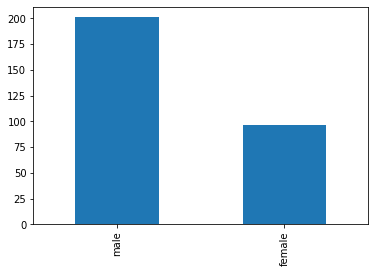

In [134]:
df['sex'].value_counts().plot(kind='bar')

It's approximately 2:1 men to women.

<AxesSubplot:>

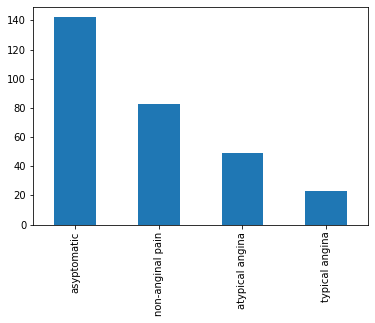

In [135]:
df['chest pain'].value_counts().plot(kind='bar')

Different chest pain types are presented.

<AxesSubplot:>

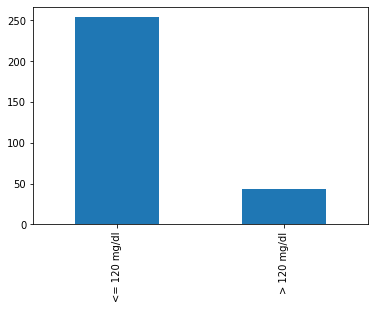

In [136]:
df["fasting blood sugar"].value_counts().plot(kind="bar")

Most people have FBS less or equal than 120 mg/dl

<AxesSubplot:>

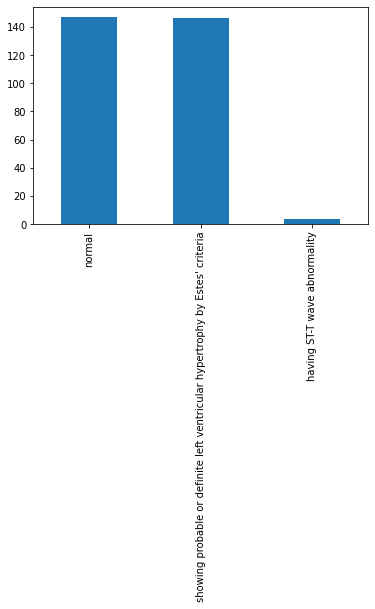

In [137]:
df["resting electrocardiographic results"].value_counts().plot(kind="bar")

There's categorical feature named "having ST-T wave abnormality" which appears much less times and can be removed.

<AxesSubplot:>

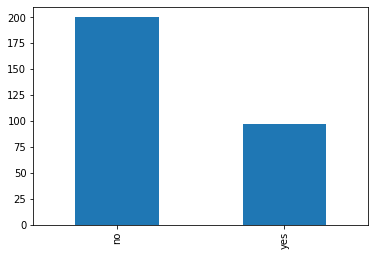

In [138]:
df["exercise induced angina"].value_counts().plot(kind="bar")

"no" values appear twice more often than "yes" values.

<AxesSubplot:>

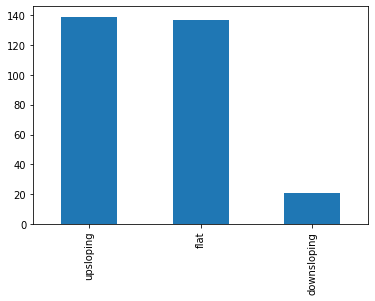

In [139]:
df["slope"].value_counts().plot(kind="bar")

downsloping values appear less often than others.

<AxesSubplot:>

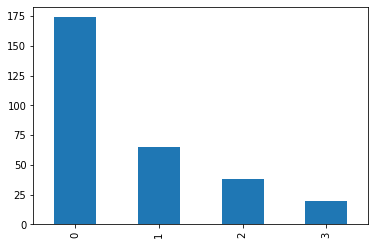

In [140]:
df["number of major vessels"].value_counts().plot(kind="bar")

The bigger the number of major vessels, the less it's frequency of appearance is.

<AxesSubplot:>

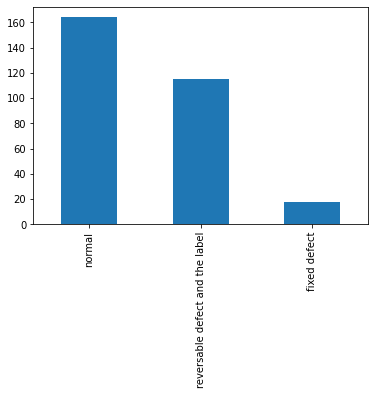

In [141]:
df["thal"].value_counts().plot(kind="bar")

Fixed detect values appear much less often.

<AxesSubplot:>

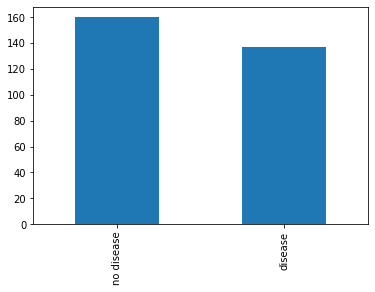

In [142]:
df["condition"].value_counts().plot(kind="bar")

There are more people, who don't have any disease.

### Numerical features analysis

<AxesSubplot:ylabel='Frequency'>

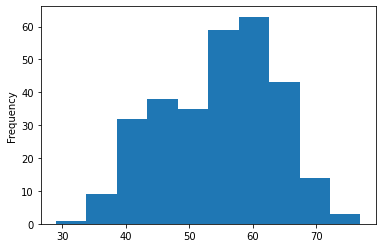

In [148]:
df["age"].plot.hist()

Age of most people is between 40 and 70.

<AxesSubplot:ylabel='Frequency'>

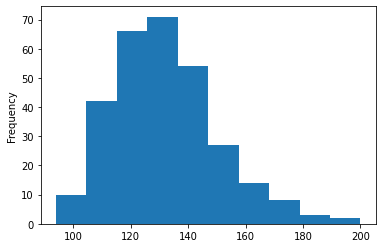

In [149]:
df["resting blood pressure"].plot.hist()

Most people have resting blood pressure from 100 to 160.

<AxesSubplot:ylabel='Frequency'>

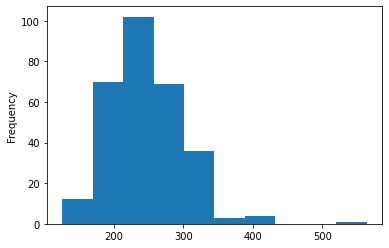

In [150]:
df["cholesterol"].plot.hist()

Different people have different levels of cholesterol but most have from 200 to 300.

<AxesSubplot:ylabel='Frequency'>

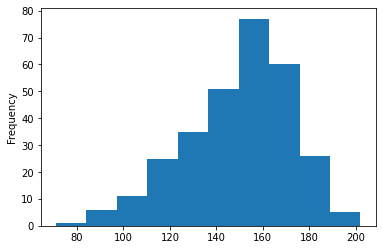

In [152]:
df["max heart rate"].plot.hist()

Most people have max heart rate from 120 to 180.

<AxesSubplot:ylabel='Frequency'>

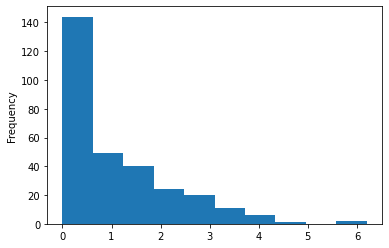

In [153]:
df["oldpeak"].plot.hist()

Most people have oldpeak close to 0.